[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyCirclize/blob/main/docs/phylogenetic_tree.ipynb)

In [1]:
# %pip install pycirclize 

## 1. Simple Tree

### 1-1. Basic Style

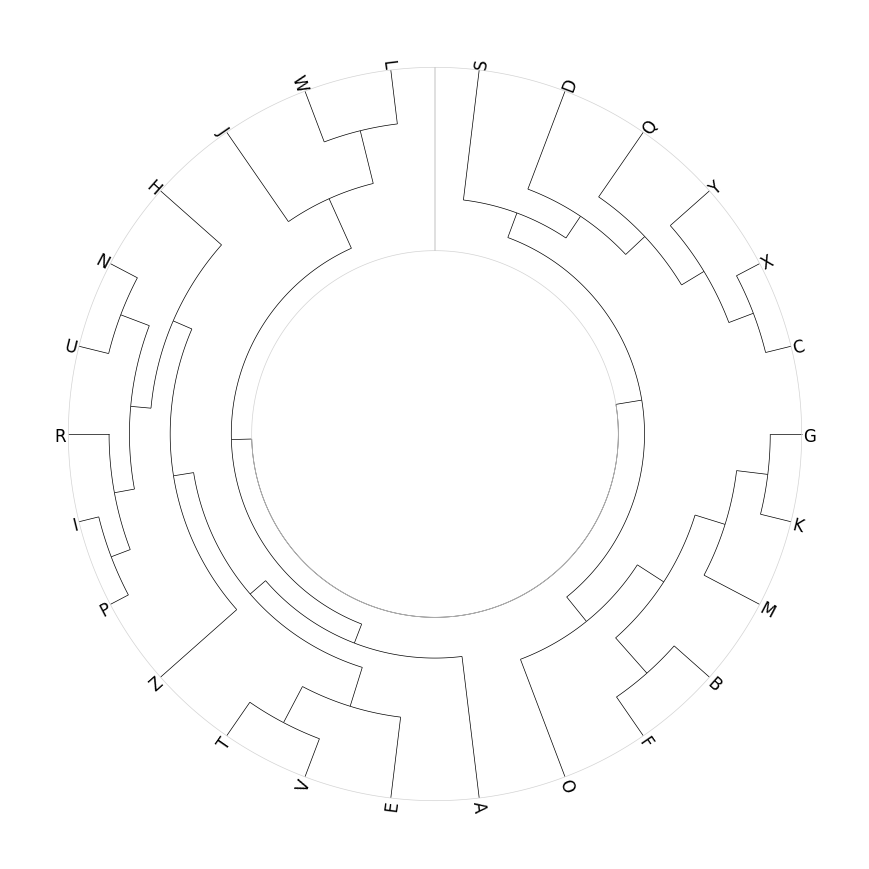

In [2]:
from pycirclize import Circos
from Bio.Phylo.BaseTree import Tree
import string
import random
random.seed(0)

# Create randomized tree
tree = Tree.randomized(string.ascii_uppercase, branch_stdev=0.5)

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree
track = sector.add_track((50, 100))
track.axis(ec="lightgrey")
track.tree(tree, leaf_label_size=12)

fig = circos.plotfig()

### 1-2. Use Branch Length

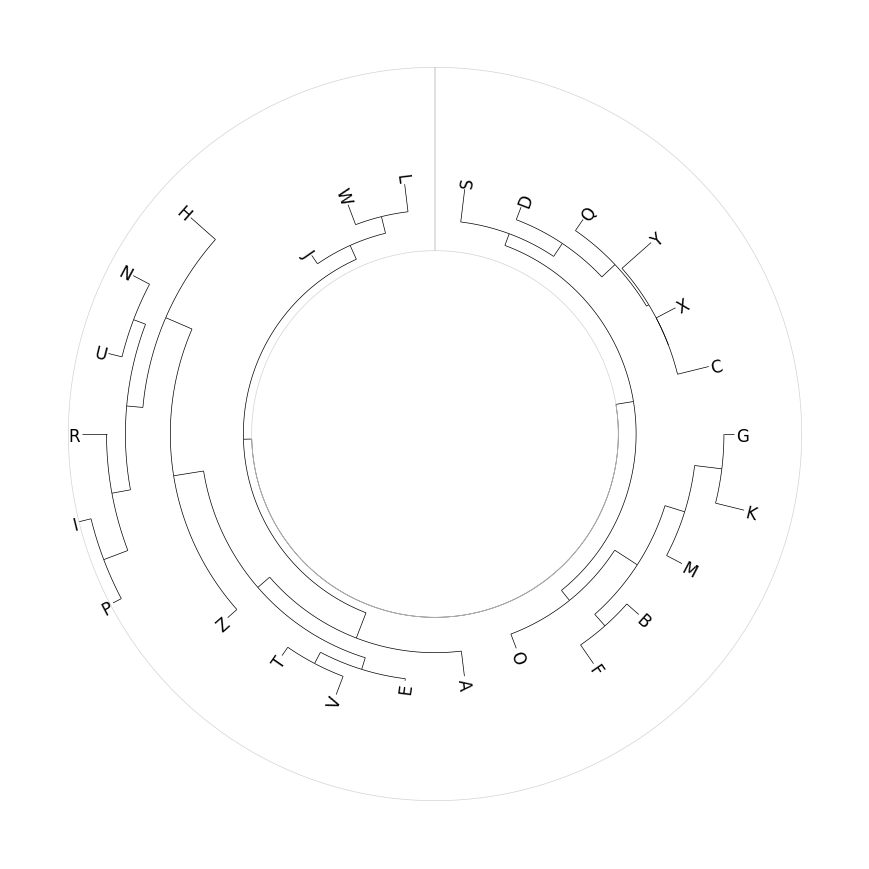

In [3]:
from pycirclize import Circos
from Bio.Phylo.BaseTree import Tree
import string
import random
random.seed(0)

# Create randomized tree
tree = Tree.randomized(string.ascii_uppercase, branch_stdev=0.5)

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree with branch length
track = sector.add_track((50, 100))
track.axis(ec="lightgrey")
track.tree(tree, use_branch_length=True, leaf_label_size=12)

fig = circos.plotfig()

### 1-3. Inner Style

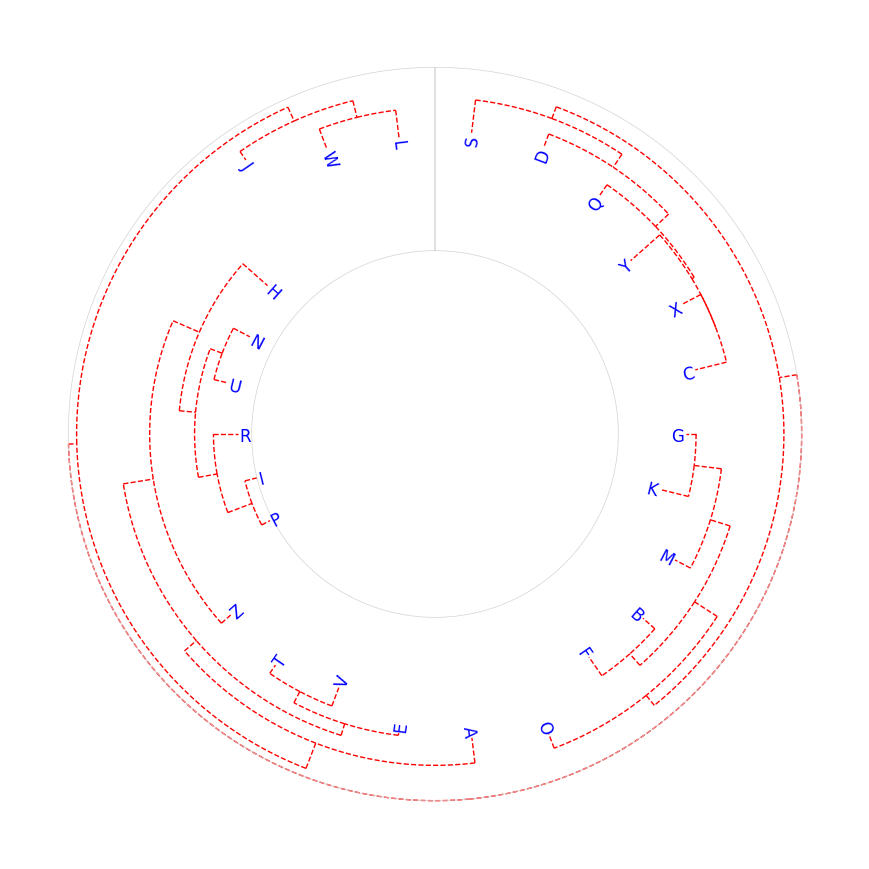

In [4]:
from pycirclize import Circos
from Bio.Phylo.BaseTree import Tree
import string
import random
random.seed(0)

# Create randomized tree
tree = Tree.randomized(string.ascii_uppercase, branch_stdev=0.5)

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree with inner style
track = sector.add_track((50, 100))
track.axis(ec="lightgrey")
track.tree(
    tree,
    outer=False,
    use_branch_length=True,
    leaf_label_size=12,
    line_kws=dict(color="red", lw=1, ls="dashed"),
    text_kws=dict(color="blue"),
)

fig = circos.plotfig()

### 1-4. Annotate Node Color

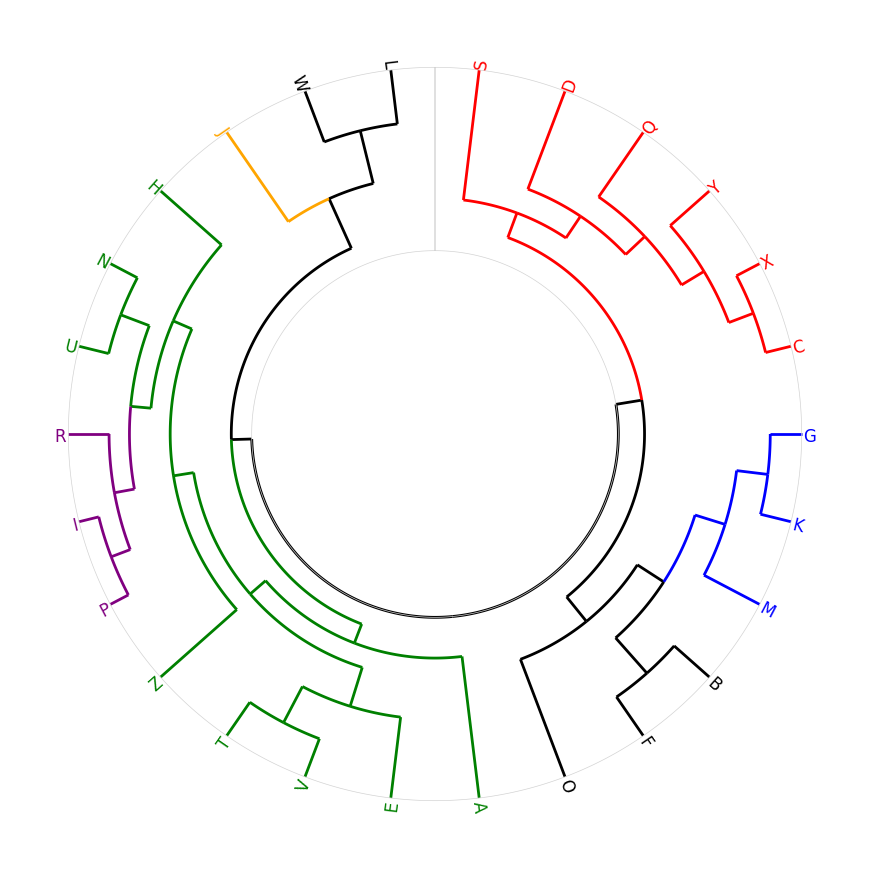

In [5]:
from pycirclize import Circos
from Bio.Phylo.BaseTree import Tree
import string
import random
random.seed(0)

# Create randomized tree
tree = Tree.randomized(string.ascii_uppercase, branch_stdev=0.5)

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree with node color annotation
track = sector.add_track((50, 100))
track.axis(ec="lightgrey")
track.tree(
    tree,
    leaf_label_size=12,
    line_kws=dict(lw=2),
    # User can set the color of specified nodes.
    # When multiple nodes are set, MRCA(Most Recent Common Ancestor) node is automatically set.
    node_color_list=[
        (["S", "Y"], "red"),
        (["G", "M"], "blue"),
        (["A", "H"], "green"),
        (["R", "P"], "purple"),
        (["J"], "orange"),
    ],
)

fig = circos.plotfig()

## 2. Large Tree

### 2-1. Basic Style

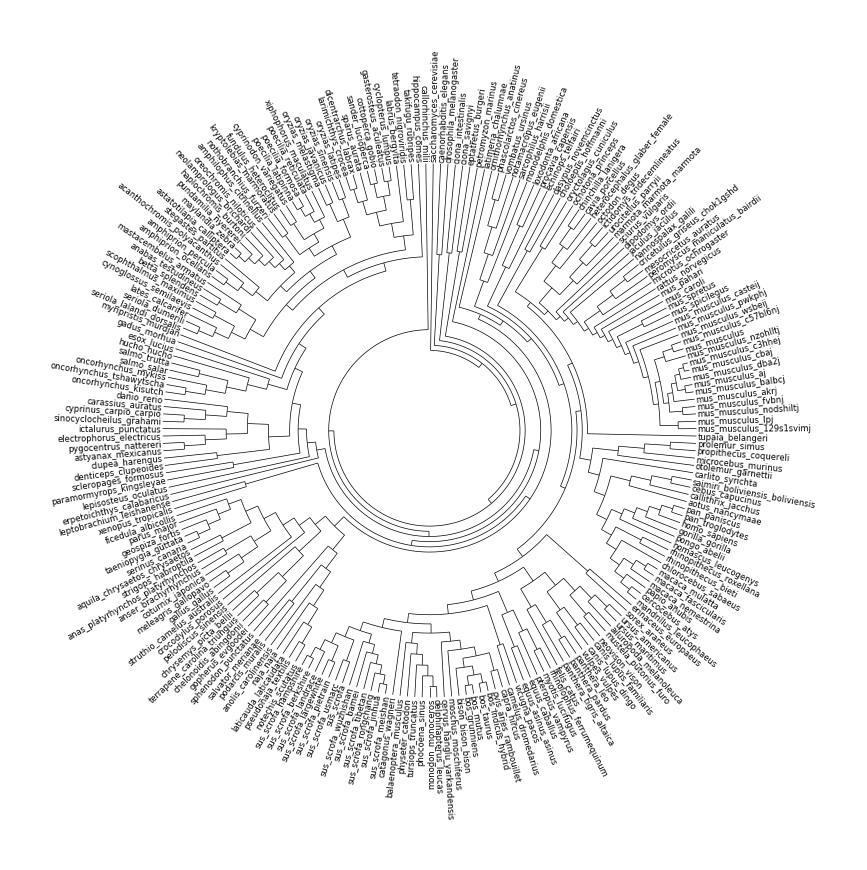

In [6]:
from pycirclize import Circos
from io import StringIO
from Bio import Phylo

# Load ensembl vertebrates species tree
# https://github.com/Ensembl/ensembl-compara/blob/release/108/conf/vertebrates/species_tree.branch_len.nw
treedata = "(saccharomyces_cerevisiae:0.120618,((caenorhabditis_elegans:0.188645,drosophila_melanogaster:0.154675):0.0001,((ciona_intestinalis:0.151626,ciona_savignyi:0.154164):0.0326426,((eptatretus_burgeri:0.128661,petromyzon_marinus:0.168899):0.0001,(((latimeria_chalumnae:0.119616,(((ornithorhynchus_anatinus:0.126661,(((((phascolarctos_cinereus:0.0374961,vombatus_ursinus:0.0354139):0.0214868,notamacropus_eugenii:0.0630732):0.0121551,sarcophilus_harrisii:0.0663059):0.00210215,monodelphis_domestica:0.0747108):0.041817,(((loxodonta_africana:0.0621637,procavia_capensis:0.0763963):0.0167726,echinops_telfairi:0.0966574):0.0238728,((dasypus_novemcinctus:0.0776614,choloepus_hoffmanni:0.0782886):0.0266673,(((((oryctolagus_cuniculus:0.0775193,ochotona_princeps:0.0912307):0.0254255,(((((chinchilla_lanigera:0.0698084,cavia_porcellus:0.0735416):0.00308896,heterocephalus_glaber_female:0.072806):0.00217288,octodon_degus:0.0761958):0.0218839,(((ictidomys_tridecemlineatus:0.0138395,urocitellus_parryii:0.0127405):0.00604211,marmota_marmota_marmota:0.0187229):0.0396847,sciurus_vulgaris:0.0598896):0.0309107):0.00727734,(dipodomys_ordii:0.100796,(jaculus_jaculus:0.0950593,(nannospalax_galili:0.0884969,((((cricetulus_griseus_chok1gshd:0.0489268,mesocricetus_auratus:0.0523932):0.0162373,peromyscus_maniculatus_bairdii:0.0640027):0.00315764,microtus_ochrogaster:0.0701299):0.0109243,(rattus_norvegicus:0.0621346,(mus_pahari:0.0365789,(mus_caroli:0.0204554,((mus_spretus:0.00899553,mus_spicilegus:0.00851447):0.00109632,(mus_musculus_casteij:0.00514915,(mus_musculus_pwkphj:0.00539701,(mus_musculus_wsbeij:0.00197001,((((mus_musculus_c57bl6nj:0.000800378,mus_musculus:0.0001):0.000869129,mus_musculus_nzohlltj:0.00153587):0.0001,(((((mus_musculus_c3hhej:0.000402511,mus_musculus_cbaj:0.000517489):0.000210904,mus_musculus_dba2j:0.0011691):0.000339507,(mus_musculus_aj:0.000316111,mus_musculus_balbcj:0.000963889):4.01914e-05):0.000353079,mus_musculus_akrj:0.000666959):0.0001,(mus_musculus_fvbnj:0.000908422,mus_musculus_nodshiltj:0.00149158):0.000254351):0.000381522):0.0001,(mus_musculus_lpj:0.0006022,mus_musculus_129s1svimj:0.0004678):0.000975719):0.000395485):0.00281515):0.000394928):0.00551731):0.0108856):0.0168717):0.0231139):0.0169089):0.0121629):0.00963979):0.00750102):0.0001):0.00359398):0.00111401,tupaia_belangeri:0.100279):0.0001,((((prolemur_simus:0.0371668,propithecus_coquereli:0.0381832):0.00519709,microcebus_murinus:0.0413679):0.0273709,otolemur_garnettii:0.0749151):0.00720083,(carlito_syrichta:0.0797557,((((saimiri_boliviensis_boliviensis:0.0262902,cebus_capucinus:0.0260398):0.00296817,callithrix_jacchus:0.0297868):0.0001,aotus_nancymaae:0.0253417):0.0236065,((((((pan_paniscus:0.00333033,pan_troglodytes:0.00220967):0.00431356,homo_sapiens:0.00659644):0.00186391,gorilla_gorilla:0.0085649):0.00847511,pongo_abelii:0.0160698):0.00267671,nomascus_leucogenys:0.0196792):0.0109495,((rhinopithecus_roxellana:0.00209258,rhinopithecus_bieti:0.00301742):0.0143196,(chlorocebus_sabaeus:0.0117095,(((macaca_mulatta:0.00254862,macaca_fascicularis:0.00312138):0.000632109,macaca_nemestrina:0.00431289):0.00440353,(papio_anubis:0.00654335,(cercocebus_atys:0.00568373,mandrillus_leucophaeus:0.00676627):0.000576652):0.00118967):0.00396999):0.00477001):0.0136962):0.0176622):0.0277189):4.07016e-05):0.0214276):0.0001,((erinaceus_europaeus:0.100896,sorex_araneus:0.107814):0.0001,((((((ursus_americanus:0.00358833,ursus_maritimus:0.00330167):0.0140233,ailuropoda_melanoleuca:0.0172617):0.0373367,(mustela_putorius_furo:0.0160833,neovison_vison:0.0160267):0.0389355):0.00651625,((canis_lupus_familiaris:0.00107493,canis_lupus_dingo:0.00129507):0.010237,vulpes_vulpes:0.012223):0.0473109):0.00622806,(((panthera_leo:0.0023694,panthera_pardus:0.0027606):0.00118517,panthera_tigris_altaica:0.00462483):0.00753429,felis_catus:0.0116707):0.0532316):0.0164948,((((rhinolophus_ferrumequinum:0.0774819,myotis_lucifugus:0.0815781):0.0001,pteropus_vampyrus:0.0766756):0.00416725,(equus_caballus:0.00631544,equus_asinus_asinus:0.00672456):0.0746163):0.00461396,((vicugna_pacos:0.0200446,camelus_dromedarius:0.0161754):0.0607905,((((((capra_hircus:0.0114539,ovis_aries_rambouillet:0.0109461):0.0168748,(((bos_indicus_hybrid:0.00208873,bos_taurus:0.00230127):0.00251618,(bos_mutus:0.00164309,bos_grunniens:0.00179691):0.00387632):0.0001,bison_bison_bison:0.00489341):0.0226352):0.00304321,moschus_moschiferus:0.0327688):0.00220821,cervus_hanglu_yarkandensis:0.0320047):0.0381676,(((((delphinapterus_leucas:0.00332618,monodon_monoceros:0.00278382):0.00488592,phocoena_sinus:0.00845408):0.00406932,tursiops_truncatus:0.0131854):0.00918139,physeter_catodon:0.0201713):3.59569e-05,balaenoptera_musculus:0.0188968):0.0427691):0.0102577,(catagonus_wagneri:0.0474384,((((((sus_scrofa_meishan:0.00197802,sus_scrofa_jinhua:0.00185198):0.000268806,sus_scrofa_rongchang:0.00200119):0.000297827,sus_scrofa_tibetan:0.00244924):0.0001,sus_scrofa_bamei:0.00219421):8.26503e-05,sus_scrofa_wuzhishan:0.00278787):0.000548203,((sus_scrofa:0.00166698,sus_scrofa_usmarc:0.00197302):0.0001,((sus_scrofa_pietrain:0.00148887,sus_scrofa_largewhite:0.00135113):4.11336e-05,(sus_scrofa_landrace:0.00145828,(sus_scrofa_berkshire:0.00154658,sus_scrofa_hampshire:0.00123342):0.000121719):3.66268e-05):0.000167893):0.000951618):0.0436318):0.0279788):0.0001):0.00900251):0.00213972):0.0167986):0.0001):0.0001):0.00447302):0.0127389):0.00618972):0.00258334,(((((((notechis_scutatus:0.0138535,pseudonaja_textilis:0.0149065):0.00846025,laticauda_laticaudata:0.0263398):0.0048699,naja_naja:0.03202):0.0836509,anolis_carolinensis:0.118737):0.0001,(podarcis_muralis:0.104185,salvator_merianae:0.104005):0.0130264):0.0121285,sphenodon_punctatus:0.128683):0.000664925,((((gopherus_evgoodei:0.0225752,chelonoidis_abingdonii:0.0226148):0.0124392,(terrapene_carolina_triunguis:0.0125212,chrysemys_picta_bellii:0.0160488):0.0179533):0.0413023,pelodiscus_sinensis:0.0780414):0.0404795,(crocodylus_porosus:0.11261,(struthio_camelus_australis:0.086911,((((gallus_gallus:0.0384215,meleagris_gallopavo:0.0409985):0.00582888,coturnix_japonica:0.0442711):0.0314855,(anser_brachyrhynchus:0.03158,anas_platyrhynchos_platyrhynchos:0.02835):0.0401148):0.00622001,((strigops_habroptila:0.0588186,aquila_chrysaetos_chrysaetos:0.0541014):0.0179818,((((serinus_canaria:0.0406713,taeniopygia_guttata:0.0411087):0.0001,geospiza_fortis:0.0371445):0.0117263,parus_major:0.0450985):0.000985951,ficedula_albicollis:0.0453808):0.0263227):0.0135466):0.00101352):0.022625):0.001615):0.0186513):0.00606934):0.0124907,(xenopus_tropicalis:0.13421,leptobrachium_leishanense:0.11976):0.0105643):0.0001):0.01745,(erpetoichthys_calabaricus:0.131615,(lepisosteus_oculatus:0.157564,((paramormyrops_kingsleyae:0.119026,scleropages_formosus:0.114334):0.0157018,(((denticeps_clupeoides:0.120175,clupea_harengus:0.101885):0.00936377,((((astyanax_mexicanus:0.0832734,pygocentrus_nattereri:0.0897366):0.0152395,electrophorus_electricus:0.107845):0.0044232,ictalurus_punctatus:0.100599):0.00947056,(((sinocyclocheilus_grahami:0.0382189,cyprinus_carpio_carpio:0.0330911):0.00869328,carassius_auratus:0.0417317):0.0358928,danio_rerio:0.0782245):0.0323979):0.000399039):0.000838201,((((((oncorhynchus_kisutch:0.014576,oncorhynchus_tshawytscha:0.014744):0.00327522,oncorhynchus_mykiss:0.0161948):0.0125529,(salmo_salar:0.0105392,salmo_trutta:0.0124108):0.0171154):0.00100227,hucho_hucho:0.0337848):0.0551761,esox_lucius:0.100082):0.0320386,(gadus_morhua:0.112842,(myripristis_murdjan:0.0864028,(((((((seriola_lalandi_dorsalis:0.0127856,seriola_dumerili:0.0127744):0.0430594,lates_calcarifer:0.0602556):0.0256458,(cynoglossus_semilaevis:0.0966934,scophthalmus_maximus:0.0988066):0.0001):0.0001,((betta_splendens:0.0848979,anabas_testudineus:0.0721821):0.00871971,mastacembelus_armatus:0.0800653):0.00740968):0.0125545,(((((amphiprion_ocellaris:0.0067724,amphiprion_percula:0.0055076):0.0270587,acanthochromis_polyacanthus:0.0398963):0.0210522,stegastes_partitus:0.0519299):0.0269526,((((((astatotilapia_calliptera:0.00240151,maylandia_zebra:0.00219849):0.000565748,pundamilia_nyererei:0.00882925):0.000672583,haplochromis_burtoni:0.00745383):0.00812133,neolamprologus_brichardi:0.0156631):0.0115662,oreochromis_niloticus:0.0224037):0.0371734,amphilophus_citrinellus:0.055699):0.0214946):0.0178319,(((nothobranchius_furzeri:0.0929233,kryptolebias_marmoratus:0.0884567):0.00806989,((fundulus_heteroclitus:0.080179,cyprinodon_variegatus:0.083961):4.55854e-05,(((poecilia_latipinna:0.00439196,poecilia_formosa:0.00522804):0.0187723,poecilia_reticulata:0.0287077):0.00866388,xiphophorus_maculatus:0.0402887):0.04475):0.0171395):0.00973038,((oryzias_melastigma:0.0447886,oryzias_javanicus:0.0376014):0.0171429,(oryzias_sinensis:0.0204791,oryzias_latipes:0.0182809):0.0449621):0.0495508):0.0001):0.0001):0.0001,(((((larimichthys_crocea:0.0609691,dicentrarchus_labrax:0.0628309):0.0065068,sparus_aurata:0.0681082):0.00615018,((sander_lucioperca:0.0657579,cottoperca_gobio:0.0648421):0.0096021,(gasterosteus_aculeatus:0.0861441,cyclopterus_lumpus:0.0665559):0.0068729):0.000497551):0.00756137,labrus_bergylta:0.0838283):0.00914651,(tetraodon_nigroviridis:0.0695586,takifugu_rubripes:0.0723514):0.0379009):0.000389394):0.0186632,hippocampus_comes:0.114595):0.0001):0.0139491):0.00587418):0.00466696):0.0001):0.00600482):0.00623517):0.0001):9.68556e-05,callorhinchus_milii:0.145499):0.00459101):0.042857):0.00997943):0.120618);"
tree = Phylo.read(StringIO(treedata), "newick")

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree
track = sector.add_track((30, 100))
track.tree(tree, leaf_label_size=6)

fig = circos.plotfig()

### 2-2. Use Branch Length

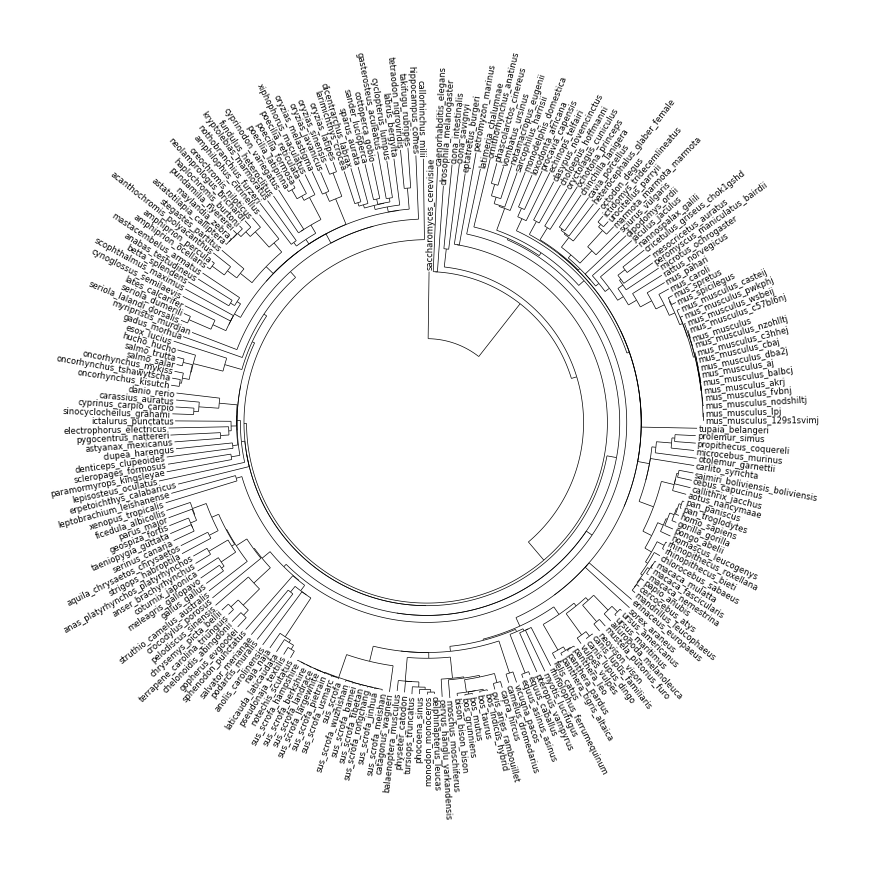

In [7]:
from pycirclize import Circos
from io import StringIO
from Bio import Phylo

# Load ensembl vertebrates species tree
# https://github.com/Ensembl/ensembl-compara/blob/release/108/conf/vertebrates/species_tree.branch_len.nw
treedata = "(saccharomyces_cerevisiae:0.120618,((caenorhabditis_elegans:0.188645,drosophila_melanogaster:0.154675):0.0001,((ciona_intestinalis:0.151626,ciona_savignyi:0.154164):0.0326426,((eptatretus_burgeri:0.128661,petromyzon_marinus:0.168899):0.0001,(((latimeria_chalumnae:0.119616,(((ornithorhynchus_anatinus:0.126661,(((((phascolarctos_cinereus:0.0374961,vombatus_ursinus:0.0354139):0.0214868,notamacropus_eugenii:0.0630732):0.0121551,sarcophilus_harrisii:0.0663059):0.00210215,monodelphis_domestica:0.0747108):0.041817,(((loxodonta_africana:0.0621637,procavia_capensis:0.0763963):0.0167726,echinops_telfairi:0.0966574):0.0238728,((dasypus_novemcinctus:0.0776614,choloepus_hoffmanni:0.0782886):0.0266673,(((((oryctolagus_cuniculus:0.0775193,ochotona_princeps:0.0912307):0.0254255,(((((chinchilla_lanigera:0.0698084,cavia_porcellus:0.0735416):0.00308896,heterocephalus_glaber_female:0.072806):0.00217288,octodon_degus:0.0761958):0.0218839,(((ictidomys_tridecemlineatus:0.0138395,urocitellus_parryii:0.0127405):0.00604211,marmota_marmota_marmota:0.0187229):0.0396847,sciurus_vulgaris:0.0598896):0.0309107):0.00727734,(dipodomys_ordii:0.100796,(jaculus_jaculus:0.0950593,(nannospalax_galili:0.0884969,((((cricetulus_griseus_chok1gshd:0.0489268,mesocricetus_auratus:0.0523932):0.0162373,peromyscus_maniculatus_bairdii:0.0640027):0.00315764,microtus_ochrogaster:0.0701299):0.0109243,(rattus_norvegicus:0.0621346,(mus_pahari:0.0365789,(mus_caroli:0.0204554,((mus_spretus:0.00899553,mus_spicilegus:0.00851447):0.00109632,(mus_musculus_casteij:0.00514915,(mus_musculus_pwkphj:0.00539701,(mus_musculus_wsbeij:0.00197001,((((mus_musculus_c57bl6nj:0.000800378,mus_musculus:0.0001):0.000869129,mus_musculus_nzohlltj:0.00153587):0.0001,(((((mus_musculus_c3hhej:0.000402511,mus_musculus_cbaj:0.000517489):0.000210904,mus_musculus_dba2j:0.0011691):0.000339507,(mus_musculus_aj:0.000316111,mus_musculus_balbcj:0.000963889):4.01914e-05):0.000353079,mus_musculus_akrj:0.000666959):0.0001,(mus_musculus_fvbnj:0.000908422,mus_musculus_nodshiltj:0.00149158):0.000254351):0.000381522):0.0001,(mus_musculus_lpj:0.0006022,mus_musculus_129s1svimj:0.0004678):0.000975719):0.000395485):0.00281515):0.000394928):0.00551731):0.0108856):0.0168717):0.0231139):0.0169089):0.0121629):0.00963979):0.00750102):0.0001):0.00359398):0.00111401,tupaia_belangeri:0.100279):0.0001,((((prolemur_simus:0.0371668,propithecus_coquereli:0.0381832):0.00519709,microcebus_murinus:0.0413679):0.0273709,otolemur_garnettii:0.0749151):0.00720083,(carlito_syrichta:0.0797557,((((saimiri_boliviensis_boliviensis:0.0262902,cebus_capucinus:0.0260398):0.00296817,callithrix_jacchus:0.0297868):0.0001,aotus_nancymaae:0.0253417):0.0236065,((((((pan_paniscus:0.00333033,pan_troglodytes:0.00220967):0.00431356,homo_sapiens:0.00659644):0.00186391,gorilla_gorilla:0.0085649):0.00847511,pongo_abelii:0.0160698):0.00267671,nomascus_leucogenys:0.0196792):0.0109495,((rhinopithecus_roxellana:0.00209258,rhinopithecus_bieti:0.00301742):0.0143196,(chlorocebus_sabaeus:0.0117095,(((macaca_mulatta:0.00254862,macaca_fascicularis:0.00312138):0.000632109,macaca_nemestrina:0.00431289):0.00440353,(papio_anubis:0.00654335,(cercocebus_atys:0.00568373,mandrillus_leucophaeus:0.00676627):0.000576652):0.00118967):0.00396999):0.00477001):0.0136962):0.0176622):0.0277189):4.07016e-05):0.0214276):0.0001,((erinaceus_europaeus:0.100896,sorex_araneus:0.107814):0.0001,((((((ursus_americanus:0.00358833,ursus_maritimus:0.00330167):0.0140233,ailuropoda_melanoleuca:0.0172617):0.0373367,(mustela_putorius_furo:0.0160833,neovison_vison:0.0160267):0.0389355):0.00651625,((canis_lupus_familiaris:0.00107493,canis_lupus_dingo:0.00129507):0.010237,vulpes_vulpes:0.012223):0.0473109):0.00622806,(((panthera_leo:0.0023694,panthera_pardus:0.0027606):0.00118517,panthera_tigris_altaica:0.00462483):0.00753429,felis_catus:0.0116707):0.0532316):0.0164948,((((rhinolophus_ferrumequinum:0.0774819,myotis_lucifugus:0.0815781):0.0001,pteropus_vampyrus:0.0766756):0.00416725,(equus_caballus:0.00631544,equus_asinus_asinus:0.00672456):0.0746163):0.00461396,((vicugna_pacos:0.0200446,camelus_dromedarius:0.0161754):0.0607905,((((((capra_hircus:0.0114539,ovis_aries_rambouillet:0.0109461):0.0168748,(((bos_indicus_hybrid:0.00208873,bos_taurus:0.00230127):0.00251618,(bos_mutus:0.00164309,bos_grunniens:0.00179691):0.00387632):0.0001,bison_bison_bison:0.00489341):0.0226352):0.00304321,moschus_moschiferus:0.0327688):0.00220821,cervus_hanglu_yarkandensis:0.0320047):0.0381676,(((((delphinapterus_leucas:0.00332618,monodon_monoceros:0.00278382):0.00488592,phocoena_sinus:0.00845408):0.00406932,tursiops_truncatus:0.0131854):0.00918139,physeter_catodon:0.0201713):3.59569e-05,balaenoptera_musculus:0.0188968):0.0427691):0.0102577,(catagonus_wagneri:0.0474384,((((((sus_scrofa_meishan:0.00197802,sus_scrofa_jinhua:0.00185198):0.000268806,sus_scrofa_rongchang:0.00200119):0.000297827,sus_scrofa_tibetan:0.00244924):0.0001,sus_scrofa_bamei:0.00219421):8.26503e-05,sus_scrofa_wuzhishan:0.00278787):0.000548203,((sus_scrofa:0.00166698,sus_scrofa_usmarc:0.00197302):0.0001,((sus_scrofa_pietrain:0.00148887,sus_scrofa_largewhite:0.00135113):4.11336e-05,(sus_scrofa_landrace:0.00145828,(sus_scrofa_berkshire:0.00154658,sus_scrofa_hampshire:0.00123342):0.000121719):3.66268e-05):0.000167893):0.000951618):0.0436318):0.0279788):0.0001):0.00900251):0.00213972):0.0167986):0.0001):0.0001):0.00447302):0.0127389):0.00618972):0.00258334,(((((((notechis_scutatus:0.0138535,pseudonaja_textilis:0.0149065):0.00846025,laticauda_laticaudata:0.0263398):0.0048699,naja_naja:0.03202):0.0836509,anolis_carolinensis:0.118737):0.0001,(podarcis_muralis:0.104185,salvator_merianae:0.104005):0.0130264):0.0121285,sphenodon_punctatus:0.128683):0.000664925,((((gopherus_evgoodei:0.0225752,chelonoidis_abingdonii:0.0226148):0.0124392,(terrapene_carolina_triunguis:0.0125212,chrysemys_picta_bellii:0.0160488):0.0179533):0.0413023,pelodiscus_sinensis:0.0780414):0.0404795,(crocodylus_porosus:0.11261,(struthio_camelus_australis:0.086911,((((gallus_gallus:0.0384215,meleagris_gallopavo:0.0409985):0.00582888,coturnix_japonica:0.0442711):0.0314855,(anser_brachyrhynchus:0.03158,anas_platyrhynchos_platyrhynchos:0.02835):0.0401148):0.00622001,((strigops_habroptila:0.0588186,aquila_chrysaetos_chrysaetos:0.0541014):0.0179818,((((serinus_canaria:0.0406713,taeniopygia_guttata:0.0411087):0.0001,geospiza_fortis:0.0371445):0.0117263,parus_major:0.0450985):0.000985951,ficedula_albicollis:0.0453808):0.0263227):0.0135466):0.00101352):0.022625):0.001615):0.0186513):0.00606934):0.0124907,(xenopus_tropicalis:0.13421,leptobrachium_leishanense:0.11976):0.0105643):0.0001):0.01745,(erpetoichthys_calabaricus:0.131615,(lepisosteus_oculatus:0.157564,((paramormyrops_kingsleyae:0.119026,scleropages_formosus:0.114334):0.0157018,(((denticeps_clupeoides:0.120175,clupea_harengus:0.101885):0.00936377,((((astyanax_mexicanus:0.0832734,pygocentrus_nattereri:0.0897366):0.0152395,electrophorus_electricus:0.107845):0.0044232,ictalurus_punctatus:0.100599):0.00947056,(((sinocyclocheilus_grahami:0.0382189,cyprinus_carpio_carpio:0.0330911):0.00869328,carassius_auratus:0.0417317):0.0358928,danio_rerio:0.0782245):0.0323979):0.000399039):0.000838201,((((((oncorhynchus_kisutch:0.014576,oncorhynchus_tshawytscha:0.014744):0.00327522,oncorhynchus_mykiss:0.0161948):0.0125529,(salmo_salar:0.0105392,salmo_trutta:0.0124108):0.0171154):0.00100227,hucho_hucho:0.0337848):0.0551761,esox_lucius:0.100082):0.0320386,(gadus_morhua:0.112842,(myripristis_murdjan:0.0864028,(((((((seriola_lalandi_dorsalis:0.0127856,seriola_dumerili:0.0127744):0.0430594,lates_calcarifer:0.0602556):0.0256458,(cynoglossus_semilaevis:0.0966934,scophthalmus_maximus:0.0988066):0.0001):0.0001,((betta_splendens:0.0848979,anabas_testudineus:0.0721821):0.00871971,mastacembelus_armatus:0.0800653):0.00740968):0.0125545,(((((amphiprion_ocellaris:0.0067724,amphiprion_percula:0.0055076):0.0270587,acanthochromis_polyacanthus:0.0398963):0.0210522,stegastes_partitus:0.0519299):0.0269526,((((((astatotilapia_calliptera:0.00240151,maylandia_zebra:0.00219849):0.000565748,pundamilia_nyererei:0.00882925):0.000672583,haplochromis_burtoni:0.00745383):0.00812133,neolamprologus_brichardi:0.0156631):0.0115662,oreochromis_niloticus:0.0224037):0.0371734,amphilophus_citrinellus:0.055699):0.0214946):0.0178319,(((nothobranchius_furzeri:0.0929233,kryptolebias_marmoratus:0.0884567):0.00806989,((fundulus_heteroclitus:0.080179,cyprinodon_variegatus:0.083961):4.55854e-05,(((poecilia_latipinna:0.00439196,poecilia_formosa:0.00522804):0.0187723,poecilia_reticulata:0.0287077):0.00866388,xiphophorus_maculatus:0.0402887):0.04475):0.0171395):0.00973038,((oryzias_melastigma:0.0447886,oryzias_javanicus:0.0376014):0.0171429,(oryzias_sinensis:0.0204791,oryzias_latipes:0.0182809):0.0449621):0.0495508):0.0001):0.0001):0.0001,(((((larimichthys_crocea:0.0609691,dicentrarchus_labrax:0.0628309):0.0065068,sparus_aurata:0.0681082):0.00615018,((sander_lucioperca:0.0657579,cottoperca_gobio:0.0648421):0.0096021,(gasterosteus_aculeatus:0.0861441,cyclopterus_lumpus:0.0665559):0.0068729):0.000497551):0.00756137,labrus_bergylta:0.0838283):0.00914651,(tetraodon_nigroviridis:0.0695586,takifugu_rubripes:0.0723514):0.0379009):0.000389394):0.0186632,hippocampus_comes:0.114595):0.0001):0.0139491):0.00587418):0.00466696):0.0001):0.00600482):0.00623517):0.0001):9.68556e-05,callorhinchus_milii:0.145499):0.00459101):0.042857):0.00997943):0.120618);"
tree = Phylo.read(StringIO(treedata), "newick")

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree with branch length
track = sector.add_track((30, 100))
track.tree(tree, use_branch_length=True, leaf_label_size=6)

fig = circos.plotfig()

### 2-3. Annotate Node Color

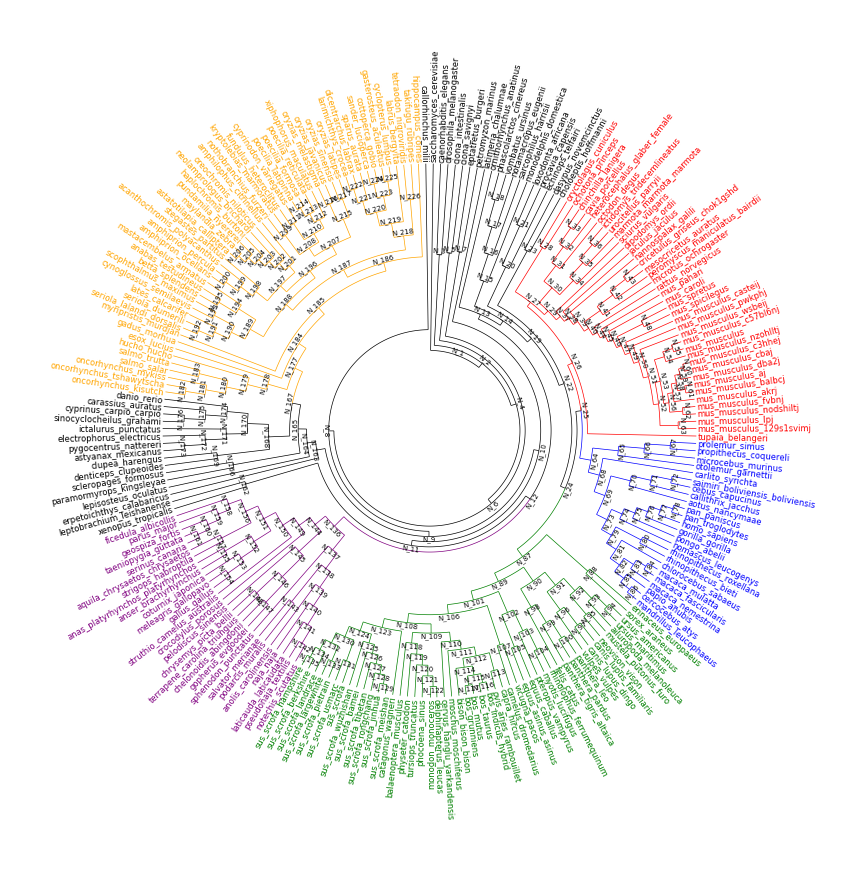

In [8]:
from pycirclize import Circos
from io import StringIO
from Bio import Phylo

# Load ensembl vertebrates species tree
# https://github.com/Ensembl/ensembl-compara/blob/release/108/conf/vertebrates/species_tree.branch_len.nw
treedata = "(saccharomyces_cerevisiae:0.120618,((caenorhabditis_elegans:0.188645,drosophila_melanogaster:0.154675):0.0001,((ciona_intestinalis:0.151626,ciona_savignyi:0.154164):0.0326426,((eptatretus_burgeri:0.128661,petromyzon_marinus:0.168899):0.0001,(((latimeria_chalumnae:0.119616,(((ornithorhynchus_anatinus:0.126661,(((((phascolarctos_cinereus:0.0374961,vombatus_ursinus:0.0354139):0.0214868,notamacropus_eugenii:0.0630732):0.0121551,sarcophilus_harrisii:0.0663059):0.00210215,monodelphis_domestica:0.0747108):0.041817,(((loxodonta_africana:0.0621637,procavia_capensis:0.0763963):0.0167726,echinops_telfairi:0.0966574):0.0238728,((dasypus_novemcinctus:0.0776614,choloepus_hoffmanni:0.0782886):0.0266673,(((((oryctolagus_cuniculus:0.0775193,ochotona_princeps:0.0912307):0.0254255,(((((chinchilla_lanigera:0.0698084,cavia_porcellus:0.0735416):0.00308896,heterocephalus_glaber_female:0.072806):0.00217288,octodon_degus:0.0761958):0.0218839,(((ictidomys_tridecemlineatus:0.0138395,urocitellus_parryii:0.0127405):0.00604211,marmota_marmota_marmota:0.0187229):0.0396847,sciurus_vulgaris:0.0598896):0.0309107):0.00727734,(dipodomys_ordii:0.100796,(jaculus_jaculus:0.0950593,(nannospalax_galili:0.0884969,((((cricetulus_griseus_chok1gshd:0.0489268,mesocricetus_auratus:0.0523932):0.0162373,peromyscus_maniculatus_bairdii:0.0640027):0.00315764,microtus_ochrogaster:0.0701299):0.0109243,(rattus_norvegicus:0.0621346,(mus_pahari:0.0365789,(mus_caroli:0.0204554,((mus_spretus:0.00899553,mus_spicilegus:0.00851447):0.00109632,(mus_musculus_casteij:0.00514915,(mus_musculus_pwkphj:0.00539701,(mus_musculus_wsbeij:0.00197001,((((mus_musculus_c57bl6nj:0.000800378,mus_musculus:0.0001):0.000869129,mus_musculus_nzohlltj:0.00153587):0.0001,(((((mus_musculus_c3hhej:0.000402511,mus_musculus_cbaj:0.000517489):0.000210904,mus_musculus_dba2j:0.0011691):0.000339507,(mus_musculus_aj:0.000316111,mus_musculus_balbcj:0.000963889):4.01914e-05):0.000353079,mus_musculus_akrj:0.000666959):0.0001,(mus_musculus_fvbnj:0.000908422,mus_musculus_nodshiltj:0.00149158):0.000254351):0.000381522):0.0001,(mus_musculus_lpj:0.0006022,mus_musculus_129s1svimj:0.0004678):0.000975719):0.000395485):0.00281515):0.000394928):0.00551731):0.0108856):0.0168717):0.0231139):0.0169089):0.0121629):0.00963979):0.00750102):0.0001):0.00359398):0.00111401,tupaia_belangeri:0.100279):0.0001,((((prolemur_simus:0.0371668,propithecus_coquereli:0.0381832):0.00519709,microcebus_murinus:0.0413679):0.0273709,otolemur_garnettii:0.0749151):0.00720083,(carlito_syrichta:0.0797557,((((saimiri_boliviensis_boliviensis:0.0262902,cebus_capucinus:0.0260398):0.00296817,callithrix_jacchus:0.0297868):0.0001,aotus_nancymaae:0.0253417):0.0236065,((((((pan_paniscus:0.00333033,pan_troglodytes:0.00220967):0.00431356,homo_sapiens:0.00659644):0.00186391,gorilla_gorilla:0.0085649):0.00847511,pongo_abelii:0.0160698):0.00267671,nomascus_leucogenys:0.0196792):0.0109495,((rhinopithecus_roxellana:0.00209258,rhinopithecus_bieti:0.00301742):0.0143196,(chlorocebus_sabaeus:0.0117095,(((macaca_mulatta:0.00254862,macaca_fascicularis:0.00312138):0.000632109,macaca_nemestrina:0.00431289):0.00440353,(papio_anubis:0.00654335,(cercocebus_atys:0.00568373,mandrillus_leucophaeus:0.00676627):0.000576652):0.00118967):0.00396999):0.00477001):0.0136962):0.0176622):0.0277189):4.07016e-05):0.0214276):0.0001,((erinaceus_europaeus:0.100896,sorex_araneus:0.107814):0.0001,((((((ursus_americanus:0.00358833,ursus_maritimus:0.00330167):0.0140233,ailuropoda_melanoleuca:0.0172617):0.0373367,(mustela_putorius_furo:0.0160833,neovison_vison:0.0160267):0.0389355):0.00651625,((canis_lupus_familiaris:0.00107493,canis_lupus_dingo:0.00129507):0.010237,vulpes_vulpes:0.012223):0.0473109):0.00622806,(((panthera_leo:0.0023694,panthera_pardus:0.0027606):0.00118517,panthera_tigris_altaica:0.00462483):0.00753429,felis_catus:0.0116707):0.0532316):0.0164948,((((rhinolophus_ferrumequinum:0.0774819,myotis_lucifugus:0.0815781):0.0001,pteropus_vampyrus:0.0766756):0.00416725,(equus_caballus:0.00631544,equus_asinus_asinus:0.00672456):0.0746163):0.00461396,((vicugna_pacos:0.0200446,camelus_dromedarius:0.0161754):0.0607905,((((((capra_hircus:0.0114539,ovis_aries_rambouillet:0.0109461):0.0168748,(((bos_indicus_hybrid:0.00208873,bos_taurus:0.00230127):0.00251618,(bos_mutus:0.00164309,bos_grunniens:0.00179691):0.00387632):0.0001,bison_bison_bison:0.00489341):0.0226352):0.00304321,moschus_moschiferus:0.0327688):0.00220821,cervus_hanglu_yarkandensis:0.0320047):0.0381676,(((((delphinapterus_leucas:0.00332618,monodon_monoceros:0.00278382):0.00488592,phocoena_sinus:0.00845408):0.00406932,tursiops_truncatus:0.0131854):0.00918139,physeter_catodon:0.0201713):3.59569e-05,balaenoptera_musculus:0.0188968):0.0427691):0.0102577,(catagonus_wagneri:0.0474384,((((((sus_scrofa_meishan:0.00197802,sus_scrofa_jinhua:0.00185198):0.000268806,sus_scrofa_rongchang:0.00200119):0.000297827,sus_scrofa_tibetan:0.00244924):0.0001,sus_scrofa_bamei:0.00219421):8.26503e-05,sus_scrofa_wuzhishan:0.00278787):0.000548203,((sus_scrofa:0.00166698,sus_scrofa_usmarc:0.00197302):0.0001,((sus_scrofa_pietrain:0.00148887,sus_scrofa_largewhite:0.00135113):4.11336e-05,(sus_scrofa_landrace:0.00145828,(sus_scrofa_berkshire:0.00154658,sus_scrofa_hampshire:0.00123342):0.000121719):3.66268e-05):0.000167893):0.000951618):0.0436318):0.0279788):0.0001):0.00900251):0.00213972):0.0167986):0.0001):0.0001):0.00447302):0.0127389):0.00618972):0.00258334,(((((((notechis_scutatus:0.0138535,pseudonaja_textilis:0.0149065):0.00846025,laticauda_laticaudata:0.0263398):0.0048699,naja_naja:0.03202):0.0836509,anolis_carolinensis:0.118737):0.0001,(podarcis_muralis:0.104185,salvator_merianae:0.104005):0.0130264):0.0121285,sphenodon_punctatus:0.128683):0.000664925,((((gopherus_evgoodei:0.0225752,chelonoidis_abingdonii:0.0226148):0.0124392,(terrapene_carolina_triunguis:0.0125212,chrysemys_picta_bellii:0.0160488):0.0179533):0.0413023,pelodiscus_sinensis:0.0780414):0.0404795,(crocodylus_porosus:0.11261,(struthio_camelus_australis:0.086911,((((gallus_gallus:0.0384215,meleagris_gallopavo:0.0409985):0.00582888,coturnix_japonica:0.0442711):0.0314855,(anser_brachyrhynchus:0.03158,anas_platyrhynchos_platyrhynchos:0.02835):0.0401148):0.00622001,((strigops_habroptila:0.0588186,aquila_chrysaetos_chrysaetos:0.0541014):0.0179818,((((serinus_canaria:0.0406713,taeniopygia_guttata:0.0411087):0.0001,geospiza_fortis:0.0371445):0.0117263,parus_major:0.0450985):0.000985951,ficedula_albicollis:0.0453808):0.0263227):0.0135466):0.00101352):0.022625):0.001615):0.0186513):0.00606934):0.0124907,(xenopus_tropicalis:0.13421,leptobrachium_leishanense:0.11976):0.0105643):0.0001):0.01745,(erpetoichthys_calabaricus:0.131615,(lepisosteus_oculatus:0.157564,((paramormyrops_kingsleyae:0.119026,scleropages_formosus:0.114334):0.0157018,(((denticeps_clupeoides:0.120175,clupea_harengus:0.101885):0.00936377,((((astyanax_mexicanus:0.0832734,pygocentrus_nattereri:0.0897366):0.0152395,electrophorus_electricus:0.107845):0.0044232,ictalurus_punctatus:0.100599):0.00947056,(((sinocyclocheilus_grahami:0.0382189,cyprinus_carpio_carpio:0.0330911):0.00869328,carassius_auratus:0.0417317):0.0358928,danio_rerio:0.0782245):0.0323979):0.000399039):0.000838201,((((((oncorhynchus_kisutch:0.014576,oncorhynchus_tshawytscha:0.014744):0.00327522,oncorhynchus_mykiss:0.0161948):0.0125529,(salmo_salar:0.0105392,salmo_trutta:0.0124108):0.0171154):0.00100227,hucho_hucho:0.0337848):0.0551761,esox_lucius:0.100082):0.0320386,(gadus_morhua:0.112842,(myripristis_murdjan:0.0864028,(((((((seriola_lalandi_dorsalis:0.0127856,seriola_dumerili:0.0127744):0.0430594,lates_calcarifer:0.0602556):0.0256458,(cynoglossus_semilaevis:0.0966934,scophthalmus_maximus:0.0988066):0.0001):0.0001,((betta_splendens:0.0848979,anabas_testudineus:0.0721821):0.00871971,mastacembelus_armatus:0.0800653):0.00740968):0.0125545,(((((amphiprion_ocellaris:0.0067724,amphiprion_percula:0.0055076):0.0270587,acanthochromis_polyacanthus:0.0398963):0.0210522,stegastes_partitus:0.0519299):0.0269526,((((((astatotilapia_calliptera:0.00240151,maylandia_zebra:0.00219849):0.000565748,pundamilia_nyererei:0.00882925):0.000672583,haplochromis_burtoni:0.00745383):0.00812133,neolamprologus_brichardi:0.0156631):0.0115662,oreochromis_niloticus:0.0224037):0.0371734,amphilophus_citrinellus:0.055699):0.0214946):0.0178319,(((nothobranchius_furzeri:0.0929233,kryptolebias_marmoratus:0.0884567):0.00806989,((fundulus_heteroclitus:0.080179,cyprinodon_variegatus:0.083961):4.55854e-05,(((poecilia_latipinna:0.00439196,poecilia_formosa:0.00522804):0.0187723,poecilia_reticulata:0.0287077):0.00866388,xiphophorus_maculatus:0.0402887):0.04475):0.0171395):0.00973038,((oryzias_melastigma:0.0447886,oryzias_javanicus:0.0376014):0.0171429,(oryzias_sinensis:0.0204791,oryzias_latipes:0.0182809):0.0449621):0.0495508):0.0001):0.0001):0.0001,(((((larimichthys_crocea:0.0609691,dicentrarchus_labrax:0.0628309):0.0065068,sparus_aurata:0.0681082):0.00615018,((sander_lucioperca:0.0657579,cottoperca_gobio:0.0648421):0.0096021,(gasterosteus_aculeatus:0.0861441,cyclopterus_lumpus:0.0665559):0.0068729):0.000497551):0.00756137,labrus_bergylta:0.0838283):0.00914651,(tetraodon_nigroviridis:0.0695586,takifugu_rubripes:0.0723514):0.0379009):0.000389394):0.0186632,hippocampus_comes:0.114595):0.0001):0.0139491):0.00587418):0.00466696):0.0001):0.00600482):0.00623517):0.0001):9.68556e-05,callorhinchus_milii:0.145499):0.00459101):0.042857):0.00997943):0.120618);"
tree = Phylo.read(StringIO(treedata), "newick")

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree with node color annotation
track = sector.add_track((30, 100))
track.tree(
    tree,
    leaf_label_size=6,
    innode_label_size=5,
    node_color_list=[
        (["mus_musculus", "tupaia_belangeri"], "red"),
        (["homo_sapiens", "prolemur_simus"], "blue"),
        # User can set the color of specified nodes.
        # When multiple nodes are set, MRCA(Most Recent Common Ancestor) node is automatically set.
        # User can also specify internal node name for color annotation (N_{idx} unique node names)
        (["N_87"], "green"),
        (["N_136"], "purple"),
        (["N_177"], "orange"),
    ]
)

fig = circos.plotfig()

### 2-4. With Heatmap

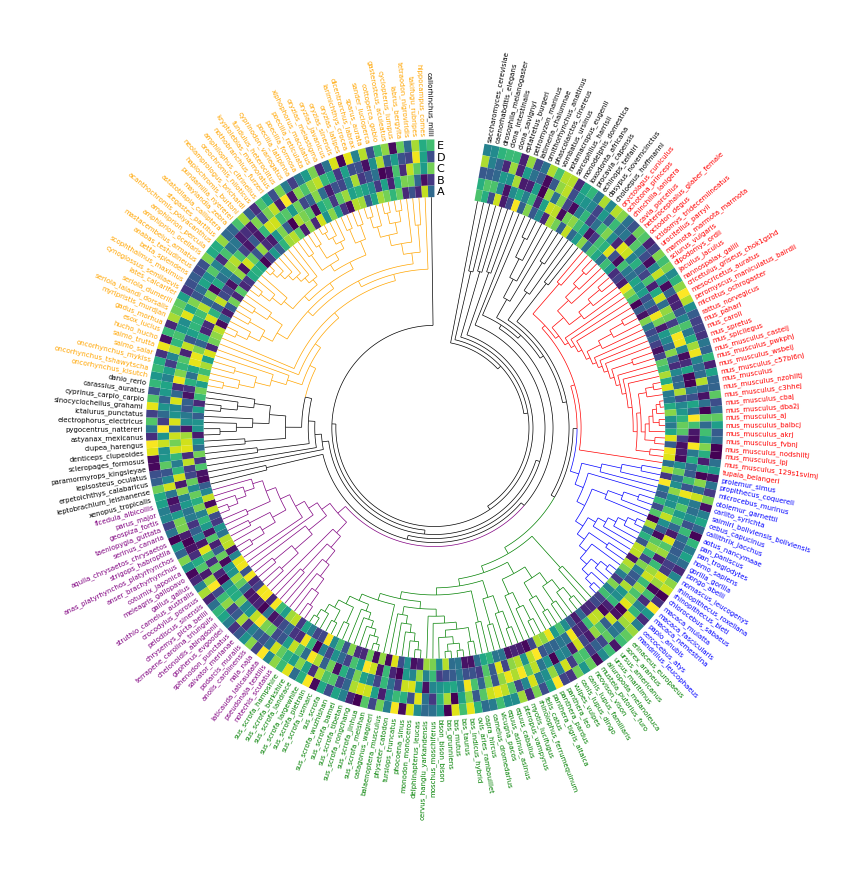

In [9]:
from pycirclize import Circos
from io import StringIO
from Bio import Phylo
import numpy as np

np.random.seed(0)

# Load ensembl vertebrates species tree
# https://github.com/Ensembl/ensembl-compara/blob/release/108/conf/vertebrates/species_tree.branch_len.nw
treedata = "(saccharomyces_cerevisiae:0.120618,((caenorhabditis_elegans:0.188645,drosophila_melanogaster:0.154675):0.0001,((ciona_intestinalis:0.151626,ciona_savignyi:0.154164):0.0326426,((eptatretus_burgeri:0.128661,petromyzon_marinus:0.168899):0.0001,(((latimeria_chalumnae:0.119616,(((ornithorhynchus_anatinus:0.126661,(((((phascolarctos_cinereus:0.0374961,vombatus_ursinus:0.0354139):0.0214868,notamacropus_eugenii:0.0630732):0.0121551,sarcophilus_harrisii:0.0663059):0.00210215,monodelphis_domestica:0.0747108):0.041817,(((loxodonta_africana:0.0621637,procavia_capensis:0.0763963):0.0167726,echinops_telfairi:0.0966574):0.0238728,((dasypus_novemcinctus:0.0776614,choloepus_hoffmanni:0.0782886):0.0266673,(((((oryctolagus_cuniculus:0.0775193,ochotona_princeps:0.0912307):0.0254255,(((((chinchilla_lanigera:0.0698084,cavia_porcellus:0.0735416):0.00308896,heterocephalus_glaber_female:0.072806):0.00217288,octodon_degus:0.0761958):0.0218839,(((ictidomys_tridecemlineatus:0.0138395,urocitellus_parryii:0.0127405):0.00604211,marmota_marmota_marmota:0.0187229):0.0396847,sciurus_vulgaris:0.0598896):0.0309107):0.00727734,(dipodomys_ordii:0.100796,(jaculus_jaculus:0.0950593,(nannospalax_galili:0.0884969,((((cricetulus_griseus_chok1gshd:0.0489268,mesocricetus_auratus:0.0523932):0.0162373,peromyscus_maniculatus_bairdii:0.0640027):0.00315764,microtus_ochrogaster:0.0701299):0.0109243,(rattus_norvegicus:0.0621346,(mus_pahari:0.0365789,(mus_caroli:0.0204554,((mus_spretus:0.00899553,mus_spicilegus:0.00851447):0.00109632,(mus_musculus_casteij:0.00514915,(mus_musculus_pwkphj:0.00539701,(mus_musculus_wsbeij:0.00197001,((((mus_musculus_c57bl6nj:0.000800378,mus_musculus:0.0001):0.000869129,mus_musculus_nzohlltj:0.00153587):0.0001,(((((mus_musculus_c3hhej:0.000402511,mus_musculus_cbaj:0.000517489):0.000210904,mus_musculus_dba2j:0.0011691):0.000339507,(mus_musculus_aj:0.000316111,mus_musculus_balbcj:0.000963889):4.01914e-05):0.000353079,mus_musculus_akrj:0.000666959):0.0001,(mus_musculus_fvbnj:0.000908422,mus_musculus_nodshiltj:0.00149158):0.000254351):0.000381522):0.0001,(mus_musculus_lpj:0.0006022,mus_musculus_129s1svimj:0.0004678):0.000975719):0.000395485):0.00281515):0.000394928):0.00551731):0.0108856):0.0168717):0.0231139):0.0169089):0.0121629):0.00963979):0.00750102):0.0001):0.00359398):0.00111401,tupaia_belangeri:0.100279):0.0001,((((prolemur_simus:0.0371668,propithecus_coquereli:0.0381832):0.00519709,microcebus_murinus:0.0413679):0.0273709,otolemur_garnettii:0.0749151):0.00720083,(carlito_syrichta:0.0797557,((((saimiri_boliviensis_boliviensis:0.0262902,cebus_capucinus:0.0260398):0.00296817,callithrix_jacchus:0.0297868):0.0001,aotus_nancymaae:0.0253417):0.0236065,((((((pan_paniscus:0.00333033,pan_troglodytes:0.00220967):0.00431356,homo_sapiens:0.00659644):0.00186391,gorilla_gorilla:0.0085649):0.00847511,pongo_abelii:0.0160698):0.00267671,nomascus_leucogenys:0.0196792):0.0109495,((rhinopithecus_roxellana:0.00209258,rhinopithecus_bieti:0.00301742):0.0143196,(chlorocebus_sabaeus:0.0117095,(((macaca_mulatta:0.00254862,macaca_fascicularis:0.00312138):0.000632109,macaca_nemestrina:0.00431289):0.00440353,(papio_anubis:0.00654335,(cercocebus_atys:0.00568373,mandrillus_leucophaeus:0.00676627):0.000576652):0.00118967):0.00396999):0.00477001):0.0136962):0.0176622):0.0277189):4.07016e-05):0.0214276):0.0001,((erinaceus_europaeus:0.100896,sorex_araneus:0.107814):0.0001,((((((ursus_americanus:0.00358833,ursus_maritimus:0.00330167):0.0140233,ailuropoda_melanoleuca:0.0172617):0.0373367,(mustela_putorius_furo:0.0160833,neovison_vison:0.0160267):0.0389355):0.00651625,((canis_lupus_familiaris:0.00107493,canis_lupus_dingo:0.00129507):0.010237,vulpes_vulpes:0.012223):0.0473109):0.00622806,(((panthera_leo:0.0023694,panthera_pardus:0.0027606):0.00118517,panthera_tigris_altaica:0.00462483):0.00753429,felis_catus:0.0116707):0.0532316):0.0164948,((((rhinolophus_ferrumequinum:0.0774819,myotis_lucifugus:0.0815781):0.0001,pteropus_vampyrus:0.0766756):0.00416725,(equus_caballus:0.00631544,equus_asinus_asinus:0.00672456):0.0746163):0.00461396,((vicugna_pacos:0.0200446,camelus_dromedarius:0.0161754):0.0607905,((((((capra_hircus:0.0114539,ovis_aries_rambouillet:0.0109461):0.0168748,(((bos_indicus_hybrid:0.00208873,bos_taurus:0.00230127):0.00251618,(bos_mutus:0.00164309,bos_grunniens:0.00179691):0.00387632):0.0001,bison_bison_bison:0.00489341):0.0226352):0.00304321,moschus_moschiferus:0.0327688):0.00220821,cervus_hanglu_yarkandensis:0.0320047):0.0381676,(((((delphinapterus_leucas:0.00332618,monodon_monoceros:0.00278382):0.00488592,phocoena_sinus:0.00845408):0.00406932,tursiops_truncatus:0.0131854):0.00918139,physeter_catodon:0.0201713):3.59569e-05,balaenoptera_musculus:0.0188968):0.0427691):0.0102577,(catagonus_wagneri:0.0474384,((((((sus_scrofa_meishan:0.00197802,sus_scrofa_jinhua:0.00185198):0.000268806,sus_scrofa_rongchang:0.00200119):0.000297827,sus_scrofa_tibetan:0.00244924):0.0001,sus_scrofa_bamei:0.00219421):8.26503e-05,sus_scrofa_wuzhishan:0.00278787):0.000548203,((sus_scrofa:0.00166698,sus_scrofa_usmarc:0.00197302):0.0001,((sus_scrofa_pietrain:0.00148887,sus_scrofa_largewhite:0.00135113):4.11336e-05,(sus_scrofa_landrace:0.00145828,(sus_scrofa_berkshire:0.00154658,sus_scrofa_hampshire:0.00123342):0.000121719):3.66268e-05):0.000167893):0.000951618):0.0436318):0.0279788):0.0001):0.00900251):0.00213972):0.0167986):0.0001):0.0001):0.00447302):0.0127389):0.00618972):0.00258334,(((((((notechis_scutatus:0.0138535,pseudonaja_textilis:0.0149065):0.00846025,laticauda_laticaudata:0.0263398):0.0048699,naja_naja:0.03202):0.0836509,anolis_carolinensis:0.118737):0.0001,(podarcis_muralis:0.104185,salvator_merianae:0.104005):0.0130264):0.0121285,sphenodon_punctatus:0.128683):0.000664925,((((gopherus_evgoodei:0.0225752,chelonoidis_abingdonii:0.0226148):0.0124392,(terrapene_carolina_triunguis:0.0125212,chrysemys_picta_bellii:0.0160488):0.0179533):0.0413023,pelodiscus_sinensis:0.0780414):0.0404795,(crocodylus_porosus:0.11261,(struthio_camelus_australis:0.086911,((((gallus_gallus:0.0384215,meleagris_gallopavo:0.0409985):0.00582888,coturnix_japonica:0.0442711):0.0314855,(anser_brachyrhynchus:0.03158,anas_platyrhynchos_platyrhynchos:0.02835):0.0401148):0.00622001,((strigops_habroptila:0.0588186,aquila_chrysaetos_chrysaetos:0.0541014):0.0179818,((((serinus_canaria:0.0406713,taeniopygia_guttata:0.0411087):0.0001,geospiza_fortis:0.0371445):0.0117263,parus_major:0.0450985):0.000985951,ficedula_albicollis:0.0453808):0.0263227):0.0135466):0.00101352):0.022625):0.001615):0.0186513):0.00606934):0.0124907,(xenopus_tropicalis:0.13421,leptobrachium_leishanense:0.11976):0.0105643):0.0001):0.01745,(erpetoichthys_calabaricus:0.131615,(lepisosteus_oculatus:0.157564,((paramormyrops_kingsleyae:0.119026,scleropages_formosus:0.114334):0.0157018,(((denticeps_clupeoides:0.120175,clupea_harengus:0.101885):0.00936377,((((astyanax_mexicanus:0.0832734,pygocentrus_nattereri:0.0897366):0.0152395,electrophorus_electricus:0.107845):0.0044232,ictalurus_punctatus:0.100599):0.00947056,(((sinocyclocheilus_grahami:0.0382189,cyprinus_carpio_carpio:0.0330911):0.00869328,carassius_auratus:0.0417317):0.0358928,danio_rerio:0.0782245):0.0323979):0.000399039):0.000838201,((((((oncorhynchus_kisutch:0.014576,oncorhynchus_tshawytscha:0.014744):0.00327522,oncorhynchus_mykiss:0.0161948):0.0125529,(salmo_salar:0.0105392,salmo_trutta:0.0124108):0.0171154):0.00100227,hucho_hucho:0.0337848):0.0551761,esox_lucius:0.100082):0.0320386,(gadus_morhua:0.112842,(myripristis_murdjan:0.0864028,(((((((seriola_lalandi_dorsalis:0.0127856,seriola_dumerili:0.0127744):0.0430594,lates_calcarifer:0.0602556):0.0256458,(cynoglossus_semilaevis:0.0966934,scophthalmus_maximus:0.0988066):0.0001):0.0001,((betta_splendens:0.0848979,anabas_testudineus:0.0721821):0.00871971,mastacembelus_armatus:0.0800653):0.00740968):0.0125545,(((((amphiprion_ocellaris:0.0067724,amphiprion_percula:0.0055076):0.0270587,acanthochromis_polyacanthus:0.0398963):0.0210522,stegastes_partitus:0.0519299):0.0269526,((((((astatotilapia_calliptera:0.00240151,maylandia_zebra:0.00219849):0.000565748,pundamilia_nyererei:0.00882925):0.000672583,haplochromis_burtoni:0.00745383):0.00812133,neolamprologus_brichardi:0.0156631):0.0115662,oreochromis_niloticus:0.0224037):0.0371734,amphilophus_citrinellus:0.055699):0.0214946):0.0178319,(((nothobranchius_furzeri:0.0929233,kryptolebias_marmoratus:0.0884567):0.00806989,((fundulus_heteroclitus:0.080179,cyprinodon_variegatus:0.083961):4.55854e-05,(((poecilia_latipinna:0.00439196,poecilia_formosa:0.00522804):0.0187723,poecilia_reticulata:0.0287077):0.00866388,xiphophorus_maculatus:0.0402887):0.04475):0.0171395):0.00973038,((oryzias_melastigma:0.0447886,oryzias_javanicus:0.0376014):0.0171429,(oryzias_sinensis:0.0204791,oryzias_latipes:0.0182809):0.0449621):0.0495508):0.0001):0.0001):0.0001,(((((larimichthys_crocea:0.0609691,dicentrarchus_labrax:0.0628309):0.0065068,sparus_aurata:0.0681082):0.00615018,((sander_lucioperca:0.0657579,cottoperca_gobio:0.0648421):0.0096021,(gasterosteus_aculeatus:0.0861441,cyclopterus_lumpus:0.0665559):0.0068729):0.000497551):0.00756137,labrus_bergylta:0.0838283):0.00914651,(tetraodon_nigroviridis:0.0695586,takifugu_rubripes:0.0723514):0.0379009):0.000389394):0.0186632,hippocampus_comes:0.114595):0.0001):0.0139491):0.00587418):0.00466696):0.0001):0.00600482):0.00623517):0.0001):9.68556e-05,callorhinchus_milii:0.145499):0.00459101):0.042857):0.00997943):0.120618);"
tree = Phylo.read(StringIO(treedata), "newick")
leaf_num = tree.count_terminals()

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": leaf_num}, start=-350, end=0)
sector = circos.sectors[0]

# Plot tree
tree_track = sector.add_track((30, 80))
tree_track.tree(
    tree,
    leaf_label_size=5,
    leaf_label_margin=21, # Set large margin for heatmap plot
    node_color_list=[
        (["mus_musculus", "tupaia_belangeri"], "red"),
        (["homo_sapiens", "prolemur_simus"], "blue"),
        (["N_87"], "green"),
        (["N_136"], "purple"),
        (["N_177"], "orange"),
    ]
)

# Plot heatmap
heatmap_track = sector.add_track((80, 100))
matrix_data = np.random.randint(0, 100, (5, leaf_num))
heatmap_track.heatmap(matrix_data, cmap="viridis")
heatmap_track.yticks([0.5, 1.5, 2.5, 3.5, 4.5], list("ABCDE"), vmax=5, tick_length=0)

fig = circos.plotfig()

## 3. Multiple Trees

### 3-1. Basic Style

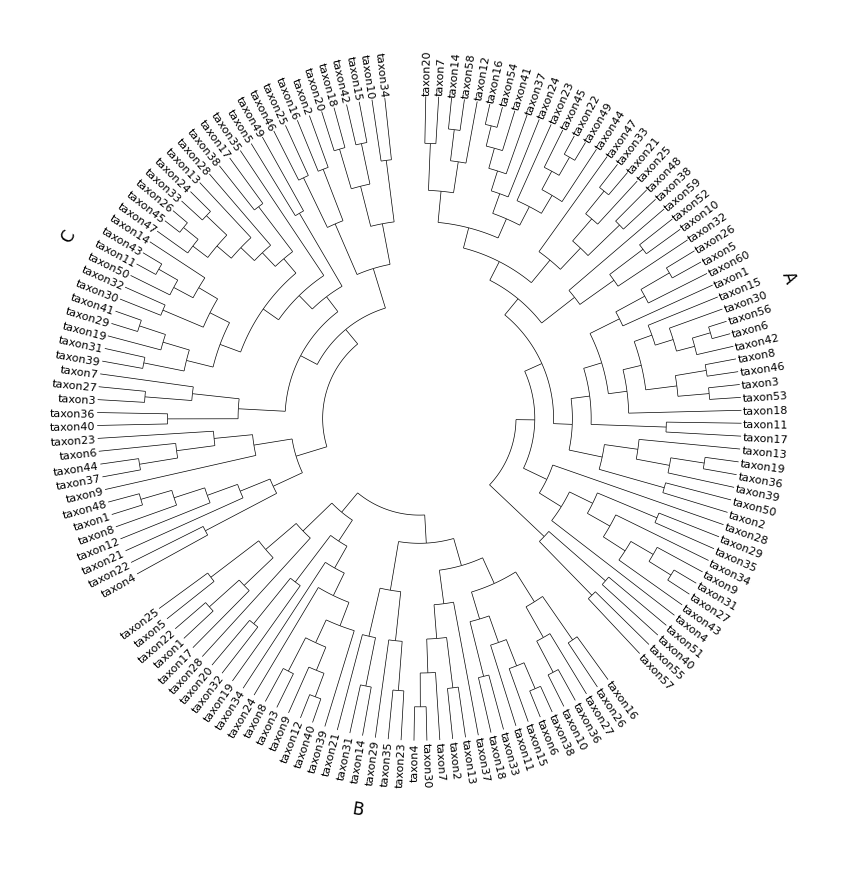

In [10]:
from pycirclize import Circos
from Bio.Phylo.BaseTree import Tree
import random
random.seed(0)

# Create 3 randomized trees
tree_size_list = [60, 40, 50]
trees = [Tree.randomized(size) for size in tree_size_list]

# Initialize circos sector with 3 randomized tree size
sectors = {name: size for name, size in zip(list("ABC"), tree_size_list)}
circos = Circos(sectors, space=5)

for sector, tree in zip(circos.sectors, trees):
    sector.text(sector.name, r=120, size=12)
    # Plot randomized tree
    tree_track = sector.add_track((30, 100))
    tree_track.tree(tree, leaf_label_size=8)

fig = circos.plotfig()

### 3-2. With Heatmap + Bar

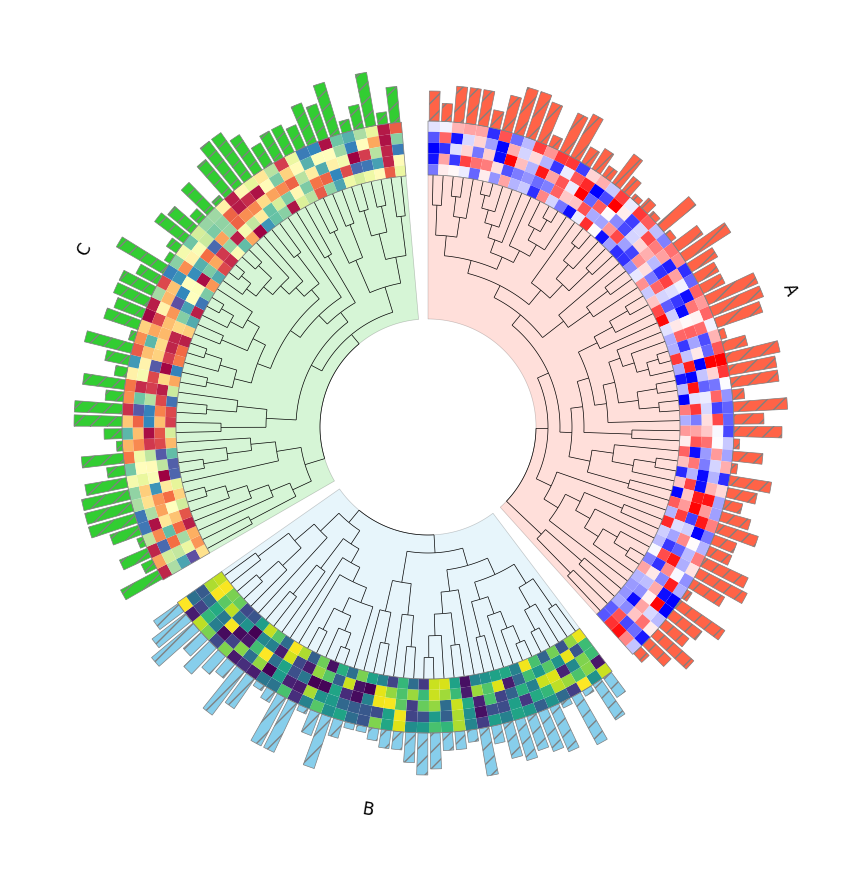

In [11]:
from pycirclize import Circos
from Bio.Phylo.BaseTree import Tree
import random
import numpy as np
random.seed(0)
np.random.seed(0)

# Create 3 randomized trees
tree_size_list = [60, 40, 50]
trees = [Tree.randomized(size) for size in tree_size_list]

# Initialize circos sector with 3 randomized tree size
sectors = {name: size for name, size in zip(list("ABC"), tree_size_list)}
circos = Circos(sectors, space=5)

colors = ["tomato", "skyblue", "limegreen"]
cmaps = ["bwr", "viridis", "Spectral"]
for idx, sector in enumerate(circos.sectors):
    sector.text(sector.name, size=12)
    # Plot randomized tree
    tree = trees[idx]
    tree_track = sector.add_track((30, 70))
    tree_track.axis(fc=colors[idx], alpha=0.2)
    tree_track.tree(tree)
    # Plot randomized heatmap
    heatmap_track = sector.add_track((70, 85))
    matrix_data = np.random.randint(0, 100, (5, int(sector.size)))
    heatmap_track.axis(ec="grey")
    heatmap_track.heatmap(matrix_data, cmap=cmaps[idx])
    # Plot randomized bar
    bar_track = sector.add_track((85, 100))
    x = np.arange(0, int(sector.size)) + 0.5
    height = np.random.randint(1, 10, int(sector.size))
    bar_track.bar(x, height, facecolor=colors[idx], ec="grey", lw=0.5, hatch="//")

fig = circos.plotfig()